# Trabajo Práctico Análisis de Datos

### Librerías

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset: Full TMDB Movies Dataset 2024 (Version 685 - 05/09/2025)

### Descripción del dataset

Es el dataset completo generado desde TMDb (The Movie Database). TMDb es una base de datos de películas completa que proporciona información sobre mas de 1M de peliculas desde 1916 hasta la actualidad.

Posee las 24 variable mostradas a continuación

Nro | Variable            | Tipo      | Descripción                                                                      |
----|---------------------|-----------|----------------------------------------------------------------------------------|
01  | id                  | int       | Identificador único de cada película.                                            |
02  | title               | str       | Título de la película.                                                           |
03  | vote_average        | float     | Promedio de votos o calificación otorgada por los espectadores.                  |
04  | vote_count          | int       | Cantidad total de votos recibidos por la película.                               |
05  | status              | str       | El estado de la película (p. ej., Lanzada, Rumoreada, En postproducción, etc).   |
06  | release_date        | str       | Fecha en que la película fue estrenada.                                          |
07  | revenue             | int       | Recaudación total generada por la película.                                      |
08  | runtime             | int       | Duraciín de la película en minutos.                                              |
09  | adult               | bool      | Indica si la película es apta solo para audiencias adultas.                      |
10  | backdrop_path       | str       | URL de la imagen de fondo de la película.                                        |
11  | budget              | int       | Presupuesto asignado para la película.                                           |
12  | homepage            | str       | URL de la página oficial de la película                                          |
13  | imdb_id             | str       | ID de IMDb de la película.                                                       |
14  | original_language   | str       | Idioma original en el que se produjo la película.                                |
15  | original_title      | str       | Título original de la película.                                                  |
16  | overview            | str       | Descripción breve o sinopsis de la película.                                     |
17  | popularity          | float     | Puntuación de popularidad de la película.                                        |
18  | poster_path         | str       | URL de la imagen del póster de la película.                                      |
19  | tagline             | str       | Eslogan o frase memorable asociada con la película.                              |
20  | genres              | str       | Lista de géneros a los que pertenece la película.                                |
21  | production_companies| str       | Lista de compañías productoras involucradas en la película.                      |
22  | production_countries| str       | Lista de países involucrados en la producción de la película.                    |
23  | spoken_languages    | str       | Lista de idiomas hablados en la película.                                        |
24  | keywords            | str       | Lista de palabras clave asociadas con la película.                               |

### Carga del Dataset

In [ ]:
# Leer el archivo CSV

import kagglehub

# Download specific version (685)

path = kagglehub.dataset_download("asaniczka/tmdb-movies-dataset-2023-930k-movies/versions/685") + "\\TMDB_movie_dataset_v11.csv"

print("Path to dataset files:", path)

df = pd.read_csv(path)


Path to dataset files: C:\Users\tincho\.cache\kagglehub\datasets\asaniczka\tmdb-movies-dataset-2023-930k-movies\versions\685\TMDB_movie_dataset_v11.csv


#### Primera inspección

In [12]:
# Mostrar las dimensiones del DataFrame

filas, columnas = df.shape
print(f"Número de observaciones (filas): {filas}")
print(f"Número de variables (columnas): {columnas}")

# Mostrar las primeras filas

df.head()

Número de observaciones (filas): 1283169
Número de variables (columnas): 24


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


## Análisis de datos faltantes

In [13]:
# Total de filas

total = len(df)

# Conteo de nulos y porcentaje

nulos = pd.DataFrame({
    "Nulos": df.isna().sum(),
    "Porcentaje (%)": (df.isna().sum() / total * 100).round(1)
})

nulos

,Nulos,Porcentaje (%)
id,0,0.0
title,15,0.0
vote_average,0,0.0
vote_count,0,0.0
status,0,0.0
release_date,251253,19.6
revenue,0,0.0
runtime,0,0.0
adult,0,0.0
backdrop_path,953762,74.3


## Análisis de las variables numéricas

In [14]:
df_numeric = df.select_dtypes(include="number").drop(columns=['id'])


### Analizo ceros
No hay nulos en numéricas.

In [15]:
# Calcular conteo y porcentaje de ceros

zero_stats = pd.DataFrame({
    "Ceros": (df_numeric == 0).sum(),
    "Porcentaje (%)": ((df_numeric == 0).sum() / len(df) * 100).round(1)
})

zero_stats

,Ceros,Porcentaje (%)
vote_average,928565,72.4
vote_count,928307,72.3
revenue,1260578,98.2
runtime,378043,29.5
budget,1212693,94.5
popularity,191013,14.9


### Histogramas
Logarítmico por diferencia de escalas.

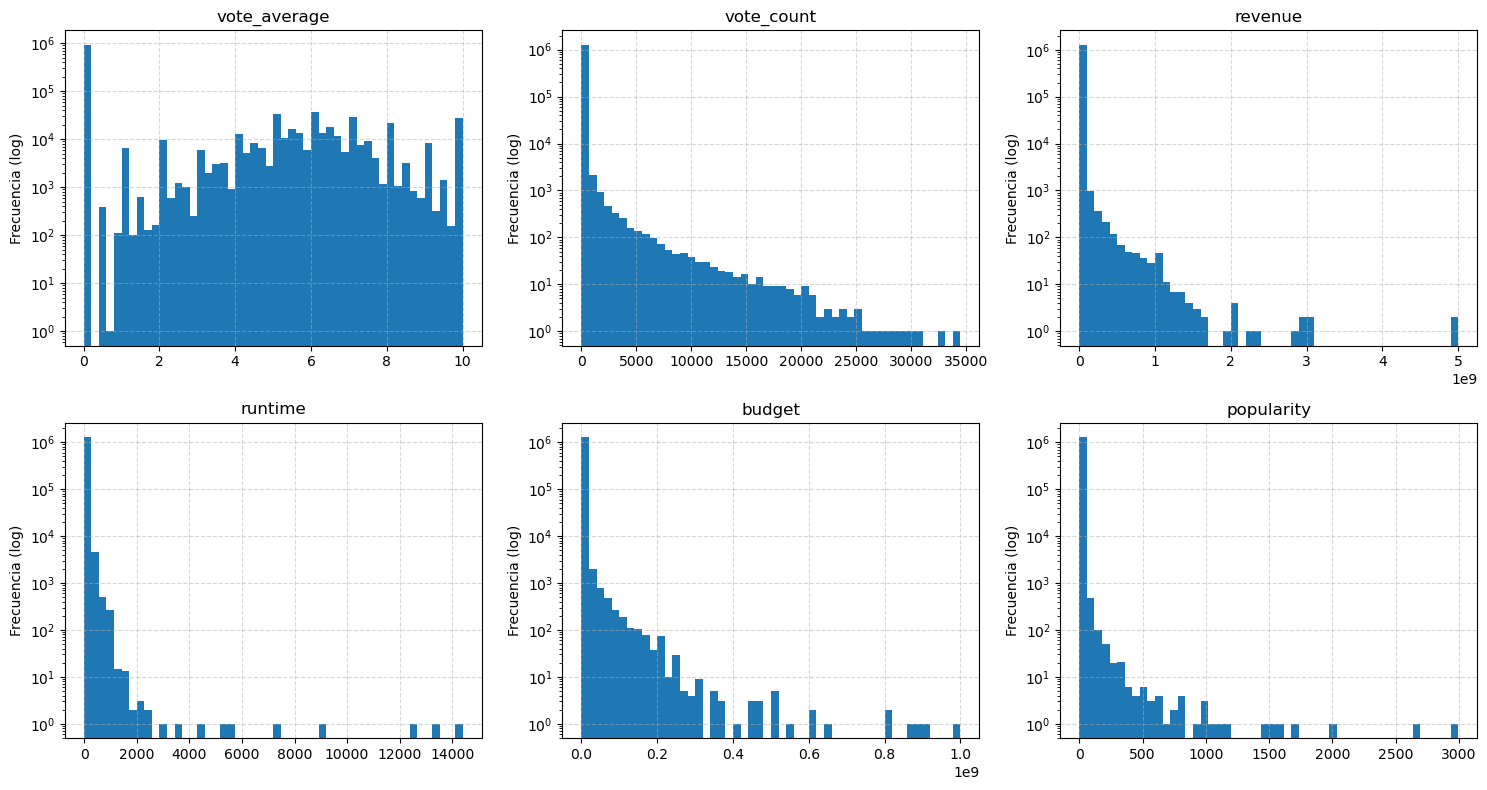

In [16]:
# Configuración de subplots

n_cols = 3
n_rows = -(-len(df_numeric.columns) // n_cols)  # redondeo hacia arriba
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

# Grafico de cada variable

for i, col in enumerate(df_numeric.columns):
    data = df_numeric[col]#[df_numeric[col] != 0]   # descartamos ceros
    axes[i].hist(data, bins=50)
    axes[i].set_yscale("log")                     # eje Y logarítmico
    axes[i].set_title(col)
    axes[i].set_ylabel("Frecuencia (log)")
    axes[i].grid(True, linestyle="--", alpha=0.5)

# Se eliminan subplots vacios

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Correlacion

Matriz

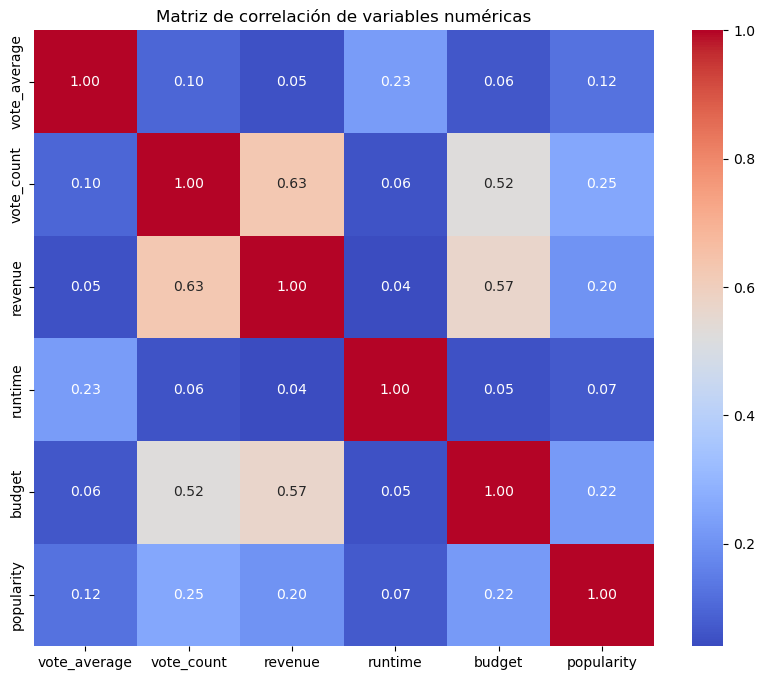

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Matriz de correlación de variables numéricas")
plt.show()

Gráficos de dispersión de las más altas

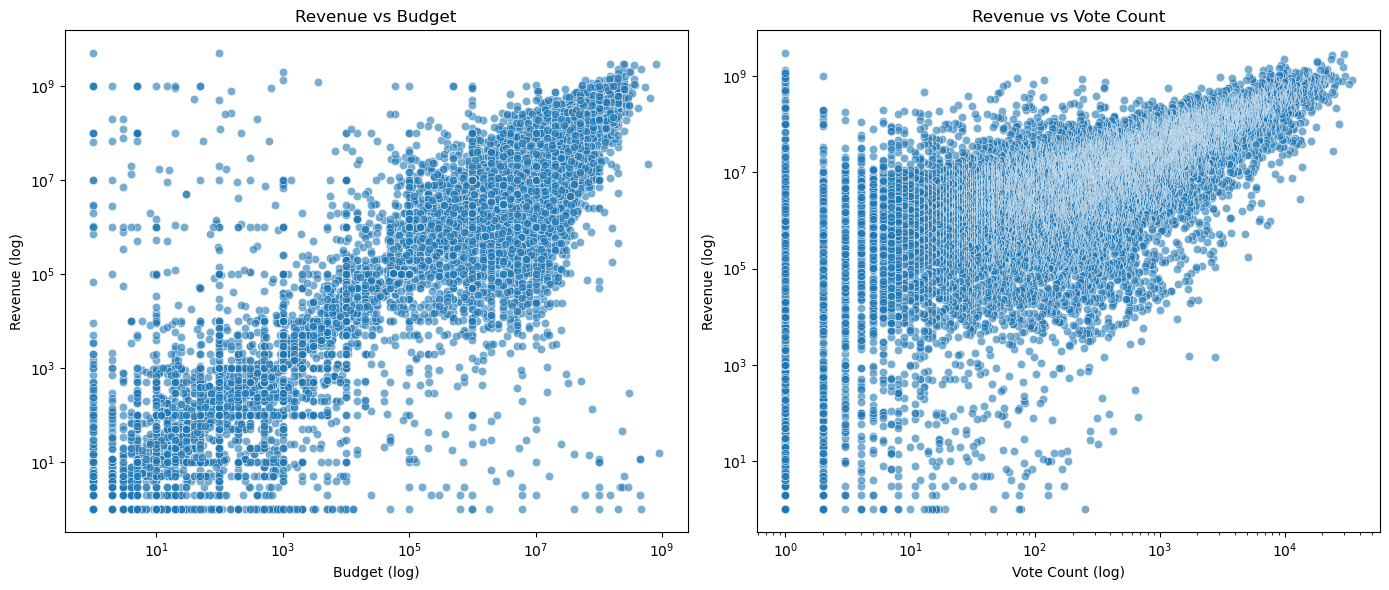

In [18]:
# Crear figura con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# ---- Gráfico 1: Budget vs Revenue ----
sns.scatterplot(
    x="budget", 
    y="revenue", 
    data=df_numeric[(df_numeric["budget"] > 0) & (df_numeric["revenue"] > 0)], 
    alpha=0.6,
    ax=axes[0]
)
axes[0].set_xscale("log")
axes[0].set_yscale("log")
axes[0].set_title("Revenue vs Budget")
axes[0].set_xlabel("Budget (log)")
axes[0].set_ylabel("Revenue (log)")

# ---- Gráfico 2: Revenue vs Vote Count ----
sns.scatterplot(
    x="vote_count", 
    y="revenue", 
    data=df_numeric[(df_numeric["vote_count"] > 0) & (df_numeric["revenue"] > 0)], 
    alpha=0.6,
    ax=axes[1]
)
axes[1].set_xscale("log")
axes[1].set_yscale("log")
axes[1].set_title("Revenue vs Vote Count")
axes[1].set_xlabel("Vote Count (log)")
axes[1].set_ylabel("Revenue (log)")

plt.tight_layout()
plt.show()

## Análisis de las variables categóricas

In [19]:
df_categorical_revenue= df[['status', 'adult', 'original_language', 'genres', 'production_companies', 'production_countries', 'spoken_languages', 'keywords', 'revenue']]

cols_lists = ["genres", "production_companies", "production_countries", "spoken_languages", "keywords"]

# Convertir las columnas de listas de strings en listas reales

df_categorical_lists = df_categorical_revenue.copy()

for col in cols_lists:
    df_categorical_lists[col] = df_categorical_lists[col].apply(
        lambda x: [item.strip() for item in x.split(",")] if isinstance(x, str) else []
    )

# Expandir las columnas de listas

df_categorical_expanded = df_categorical_lists.copy()

for col in cols_lists:
    if col in df_categorical_expanded.columns:
        df_categorical_expanded = df_categorical_expanded.explode(col, ignore_index=True)


print("Cantidad de filas expandidas:", len(df_categorical_expanded))
df_categorical_expanded.sample(10)

Cantidad de filas expandidas: 9613479


,status,adult,original_language,genres,production_companies,production_countries,spoken_languages,keywords,revenue
6547801,Released,False,sr,Drama,Zepter International,Serbia,Slovenian,NaN,0
2552476,Released,False,fr,Drama,Lumière,Netherlands,Dutch,grief,3129968
391975,Released,False,en,Drama,Raffaella Productions,United Kingdom,English,2070s,27975429
5751744,Released,False,sv,Thriller,Nordisk Film Denmark,Sweden,Swedish,terrorism,0
4060459,Released,False,en,Drama,Téléfilm Canada,Canada,German,platoon,0
1732038,Released,False,en,Mystery,SCOPE Pictures,Czech Republic,Swedish,paris,1305195
98350,Released,False,en,Drama,Columbia Pictures,United States of America,Spanish,revisionist history,374251247
5253662,Released,False,ja,Drama,Toei Animation,Japan,Japanese,sports,0
6497423,Released,False,zh,Drama,Lianhua Film Company,China,No Language,NaN,0
915949,Released,False,en,Drama,Marvel Enterprises,United States of America,English,massacre,54700105


Cantidad de categorias por variable

In [20]:
resumen = pd.DataFrame({
    "Columna": cols_lists,
    "Categorías únicas": [df_categorical_expanded[col].nunique() for col in cols_lists]
})

print(resumen)

                Columna  Categorías únicas
0                genres                 19
1  production_companies             176841
2  production_countries                250
3      spoken_languages                186
4              keywords              63131


Recaudación promedio por género

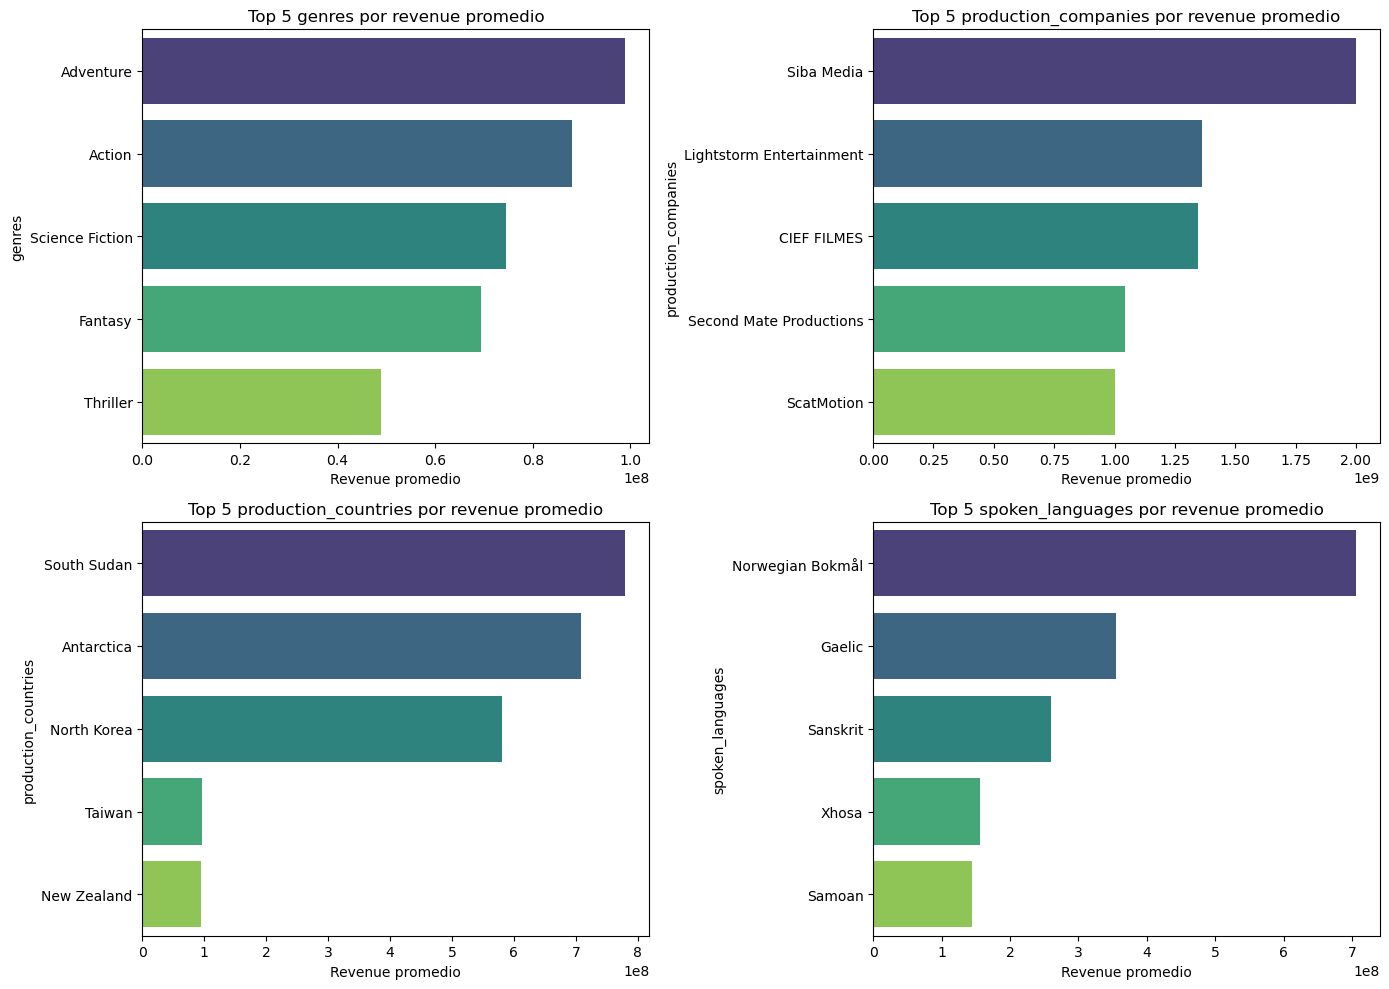

In [21]:
# Lista de columnas categóricas a analizar
cols_lists = ["genres", "production_companies", "production_countries", "spoken_languages"]

# Configurar subplots (2 filas x 2 columnas en este caso)
fig, axes = plt.subplots(2, 2, figsize=(14,10))

for ax, col in zip(axes.flatten(), cols_lists):
    revenue_by_cat = (
        df_categorical_expanded.groupby(col)["revenue"]
        .mean()
        .sort_values(ascending=False)
        .head(5)  # top 5
    )
    
    sns.barplot(
        x=revenue_by_cat.values,
        y=revenue_by_cat.index,
        palette="viridis", hue=revenue_by_cat.index, legend=False,
        ax=ax
    )
    
    ax.set_title(f"Top 5 {col} por revenue promedio")
    ax.set_xlabel("Revenue promedio")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()